In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#Загружаем данные

In [4]:
data=pd.read_excel('Data_.xlsx')

In [5]:
data.head()

,ID,CAT_1,CAT_2,CAT_3,CAT_4,NUM_1,NUM_2,NUM_3,NUM_4,NUM_5,...,CAT_19,CAT_20,CAT_21,NUM_22,NUM_23,NUM_24,CAT_22,NUM_24.1,CAT_23,TARGET
0,1,1,1,1,0,0,0,0,0,0,...,0,0,1,827,110,0,0,0,25632.101911,170183.221394
1,2,1,1,1,0,0,576,1,1152,0,...,0,0,0,945,88,0,0,0,25644.458599,373167.413573
2,3,1,1,1,0,0,576,1,1152,0,...,0,0,1,714,177,0,0,0,25669.171975,129008.177510
3,4,1,2,1,0,0,64,1,64,0,...,1,0,0,68,1,0,0,0,25669.554140,157612.600437
4,5,1,1,1,1,0,49,1,49,2,...,0,0,0,19,131,0,0,2,25669.554140,114040.417817


ВИЗУАЛЬНЫЙ АНАЛИЗ

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([153., 502., 444., 265., 107.,  52.,  23.,   7.,   3.,   1.]),
 array([ 73825.93267131, 130601.31674152, 187376.70081174, 244152.08488195,
        300927.46895216, 357702.85302237, 414478.23709259, 471253.6211628 ,
        528029.00523301, 584804.38930323, 641579.77337344]),
 <a list of 10 Patch objects>)

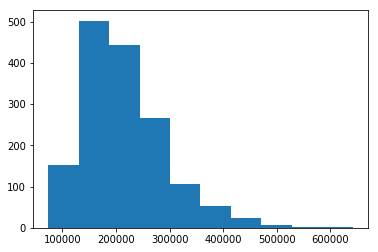

In [8]:
plt.hist(data['TARGET'])

In [9]:
#Target можно логарифмировать для приведения к нормальному распределению

In [10]:
data['log_target']=data['TARGET'].apply(lambda x: np.log(x))

(array([ 12.,  57., 161., 292., 412., 302., 205.,  83.,  28.,   5.]),
 array([11.20946534, 11.42568769, 11.64191003, 11.85813238, 12.07435473,
        12.29057707, 12.50679942, 12.72302177, 12.93924412, 13.15546646,
        13.37168881]),
 <a list of 10 Patch objects>)

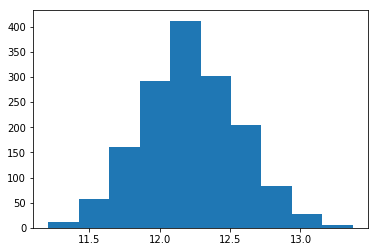

In [11]:
plt.hist(data['log_target'])

In [12]:
#Посмотрим на распределение таргета во времени

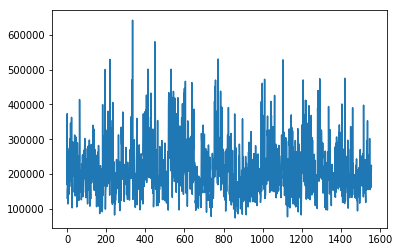

In [13]:
plt.plot(data['TARGET'])

In [14]:
#Можно попытаться добавить фактор времени

In [15]:
#Разделим выборку на валидационную и обучающую. Отменим параметр shuffle, 
#тк если идея с временным рядом сработает, нужно проверить ее на следующем периоде

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
data_train, data_valid=train_test_split(data, test_size=0.2, shuffle=False, random_state=42)

In [18]:
#Добавим фичу, которая является прогнозом по модели временного ряда

In [19]:
#Нам нужна модель с сезонностью, тк на графике прослеживаются периоды

In [20]:
from statsmodels.tsa.api import Holt, ExponentialSmoothing
fit1 = Holt(data_train['TARGET']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
print(np.mean(abs(fit1.forecast(len(data_valid))-data_valid['TARGET'])))

fit2 =  ExponentialSmoothing(data_train['TARGET'], seasonal_periods=8, trend='mul', seasonal='add').fit(use_boxcox=True)
print(np.mean(abs(fit2.forecast(len(data_valid))-data_valid['TARGET'])))

fit3 = Holt(data_train['TARGET'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
print(np.mean(abs(fit3.forecast(len(data_valid))-data_valid['TARGET'])))

962180.0437694886


C:\Users\volko\Anaconda3\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\volko\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\volko\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
C:\Users\volko\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\volko\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


205462.34987092347
60188.670829593444


In [21]:
np.mean(abs(fit3.fittedvalues-data_train['TARGET']))

66538.1875660727

In [22]:
fit = Holt(data['TARGET'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
data['predict']=fit.fittedvalues

In [23]:
#Обработаем фичи

In [24]:
#NUM_1

In [25]:
data['NUM_1'].value_counts()

0    1387
1     162
2       7
3       1
Name: NUM_1, dtype: int64

In [26]:
#NUM_1 похожа на категориальную

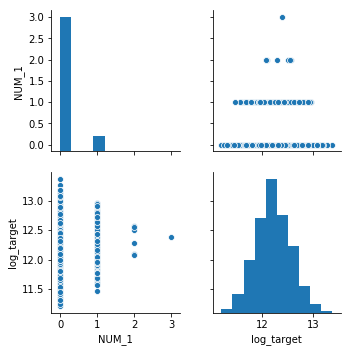

In [27]:
sns.pairplot(data[['NUM_1','log_target']])

In [28]:
#Средние равны- зависимости нет
#NUM_1 категориальная

In [29]:
#NUM_2

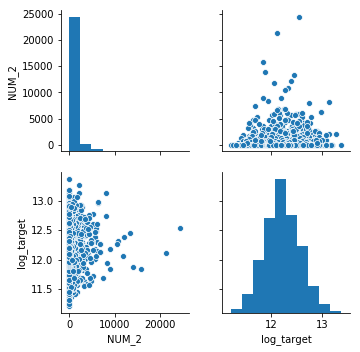

In [30]:
sns.pairplot(data[['NUM_2','log_target']])

In [31]:
#Наличие взаимосвязи не наблюдается

In [32]:
data['NUM_2'].describe(percentiles=(0.8,0.99))

count     1557.000000
mean       630.425819
std       1631.201994
min          0.000000
50%          0.000000
80%        839.000000
99%       6769.320000
max      24396.000000
Name: NUM_2, dtype: float64

In [33]:
#Половина нулей

In [34]:
pd.DataFrame([x**(1/10) for x in data['NUM_2']]).describe(percentiles=(0.8,0.99))

,0
count,1557.000000
mean,0.825192
std,0.975961
min,0.000000
50%,0.000000
80%,1.960542
99%,2.415764
max,2.746198


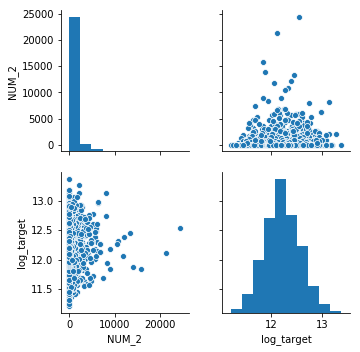

In [35]:
sns.pairplot(data[['NUM_2','log_target']])

In [36]:
#Зависимости не наблюдается

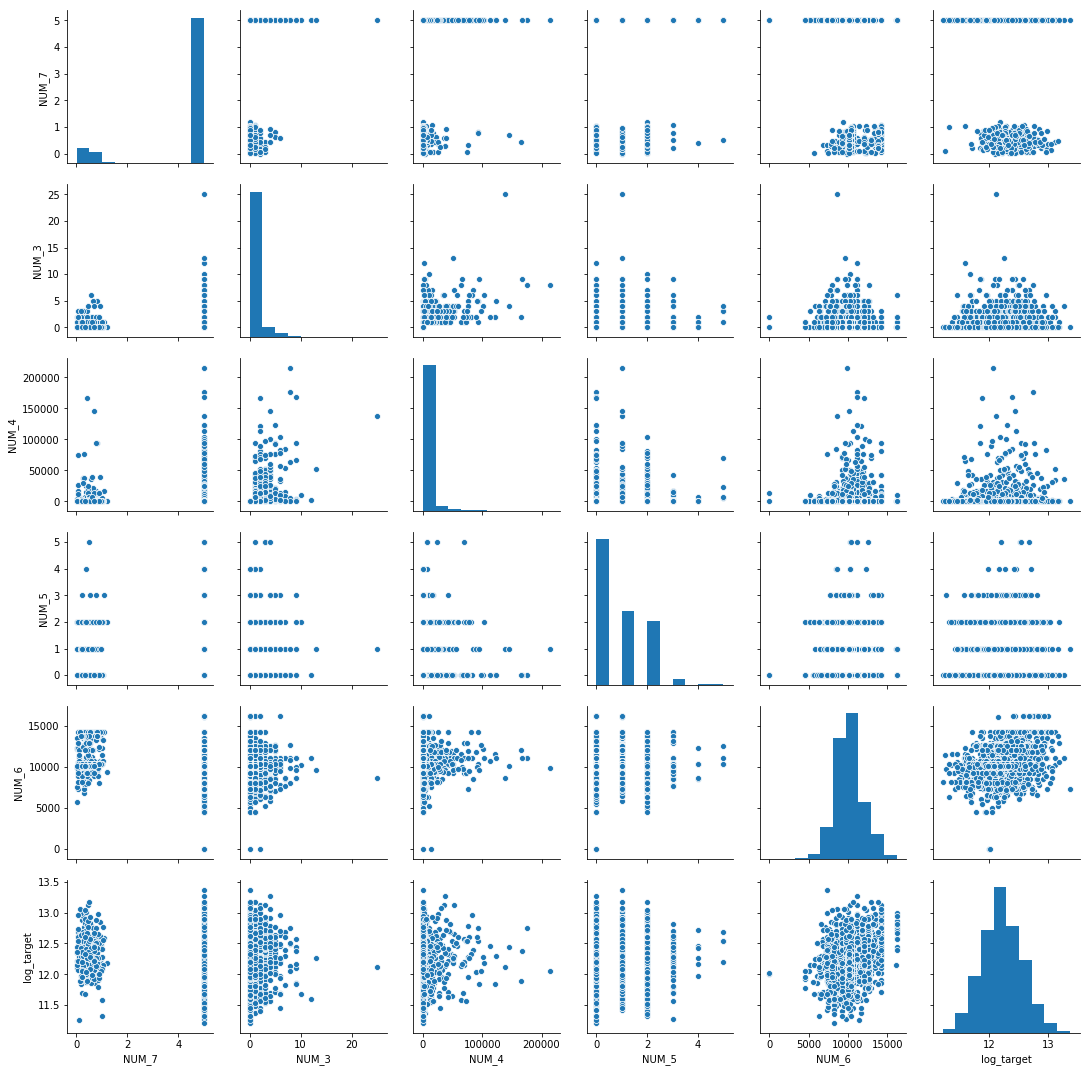

In [37]:
sns.pairplot(data[['NUM_7',
 'NUM_3',
 'NUM_4',
 'NUM_5',
 'NUM_6','log_target']])

In [38]:
#NUM_7

In [39]:
data['NUM_7'].describe(percentiles=(0.01,0.99))

count    1557.000000
mean        4.291083
std         1.644679
min         0.006480
1%          0.072713
50%         5.000000
99%         5.000000
max         5.000000
Name: NUM_7, dtype: float64

In [40]:
#NUM_7- незначимая переменная, 50%- 5рки

In [41]:
data['NUM_3'].value_counts()

0     898
1     341
2     159
3      64
4      40
5      20
6      14
9       7
8       5
7       5
25      1
13      1
12      1
10      1
Name: NUM_3, dtype: int64

In [42]:
#NUM_3- незначимая переменная

In [43]:
data['NUM_5'].value_counts()

0    775
1    396
2    341
3     35
4      6
5      4
Name: NUM_5, dtype: int64

In [44]:
#NUM_5 категориальная, зависимоси нет, средние по группам близки

In [45]:
#NUM_4- зависимости нет

In [46]:
data['NUM_4'].describe()

count      1557.000000
mean       5416.594733
std       17341.916540
min           0.000000
25%           0.000000
50%           0.000000
75%        1599.000000
max      214648.000000
Name: NUM_4, dtype: float64

In [47]:
#Очень много переменных, где нулевые данные, и там они скорее всего не определены, а не нули

In [48]:
#Интерес вызывает NUM_6

In [49]:
data['NUM_6'].describe(percentiles=(0.01,0.99))

count     1557.000000
mean     10202.684008
std       1870.687356
min          0.000000
1%        6300.000000
50%      10000.000000
99%      14200.000000
max      16200.000000
Name: NUM_6, dtype: float64

In [50]:
#Надо почистить от выбросов

In [51]:
data=data[data['NUM_6']>=6300]

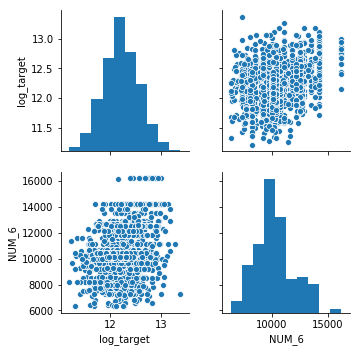

In [52]:
sns.pairplot(data[['log_target', 'NUM_6']])

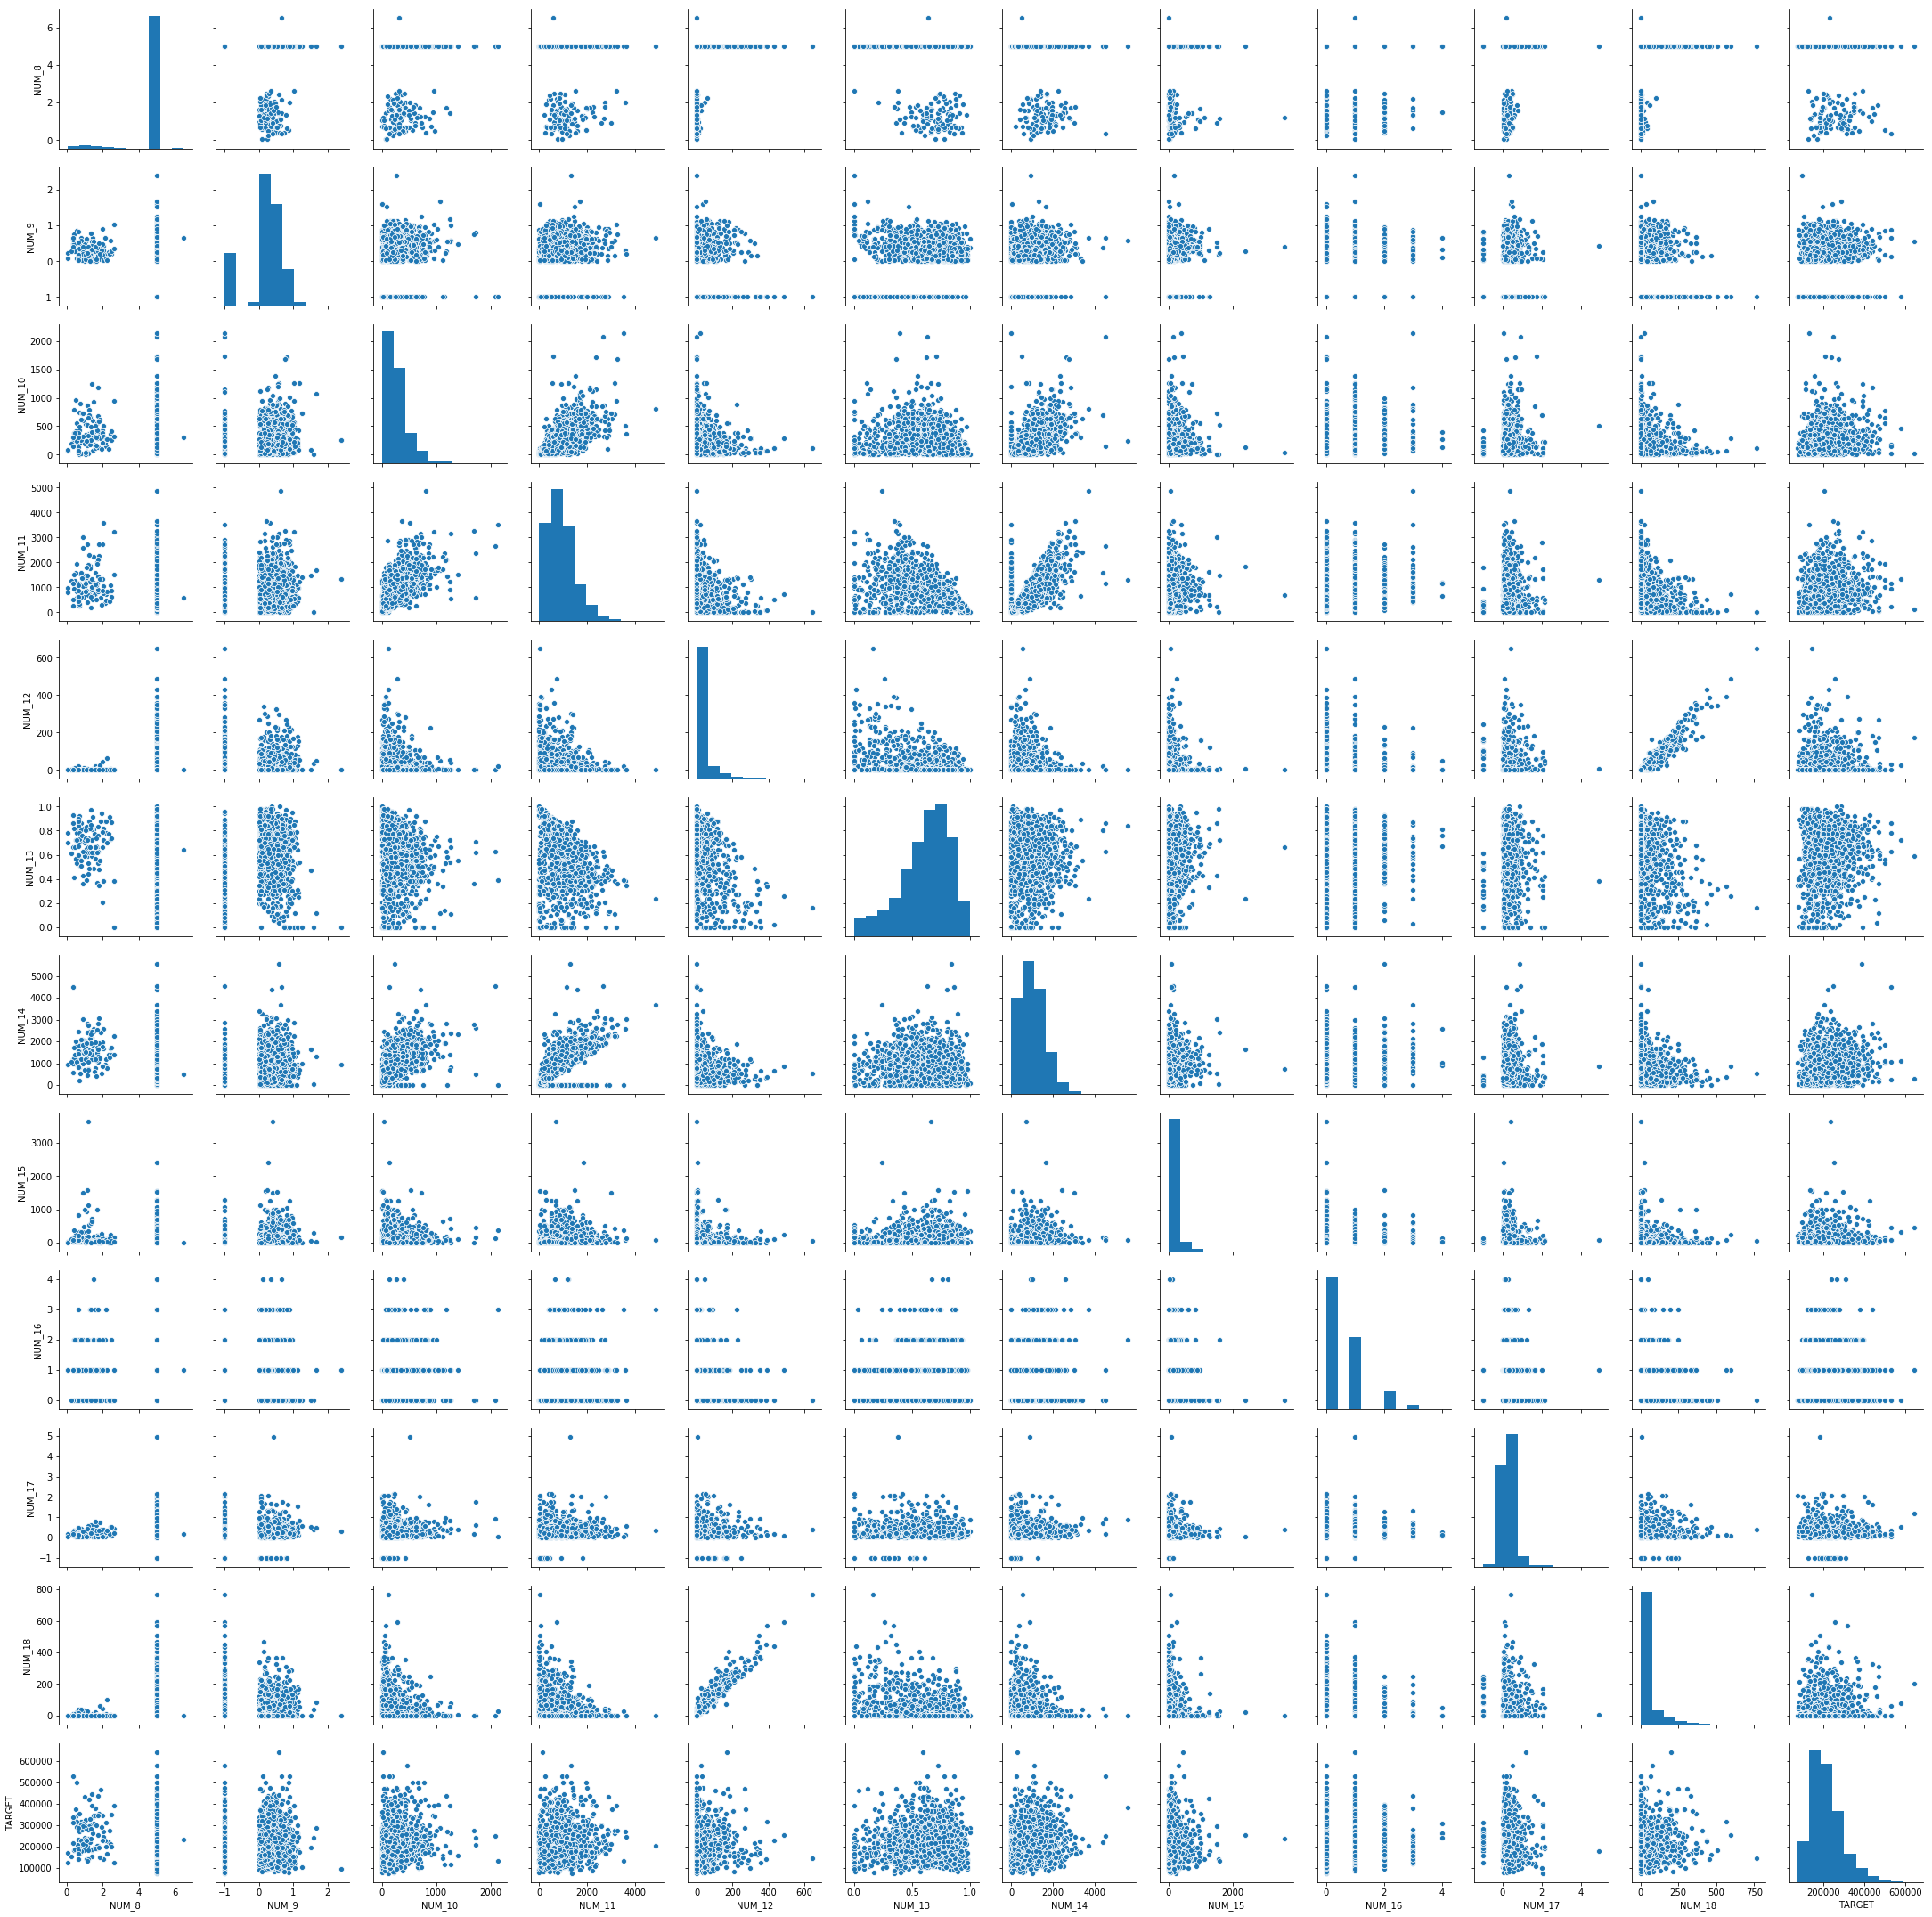

In [53]:
sns.pairplot(data[['NUM_8',
 'NUM_9',
 'NUM_10',
 'NUM_11',
 'NUM_12','NUM_13','NUM_14','NUM_15','NUM_16','NUM_17','NUM_18','TARGET']])

In [54]:
#NUM_16 категориальная

In [55]:
#Вызывает интерес NUM_11

In [56]:
data['NUM_11'].describe(percentiles=(0.02,0.99))

count    1542.000000
mean      913.078223
std       610.174133
min         0.000000
2%          7.640000
50%       819.655000
99%      2818.945100
max      4853.790000
Name: NUM_11, dtype: float64

In [57]:
#Обработаем выбросы

In [58]:
data=data[data['NUM_11']<=2800]

In [59]:
#Cделаем ровнее распределение

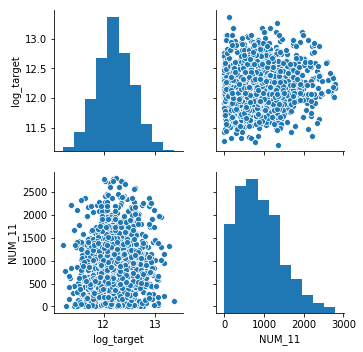

In [60]:
sns.pairplot(data[['log_target', 'NUM_11']])

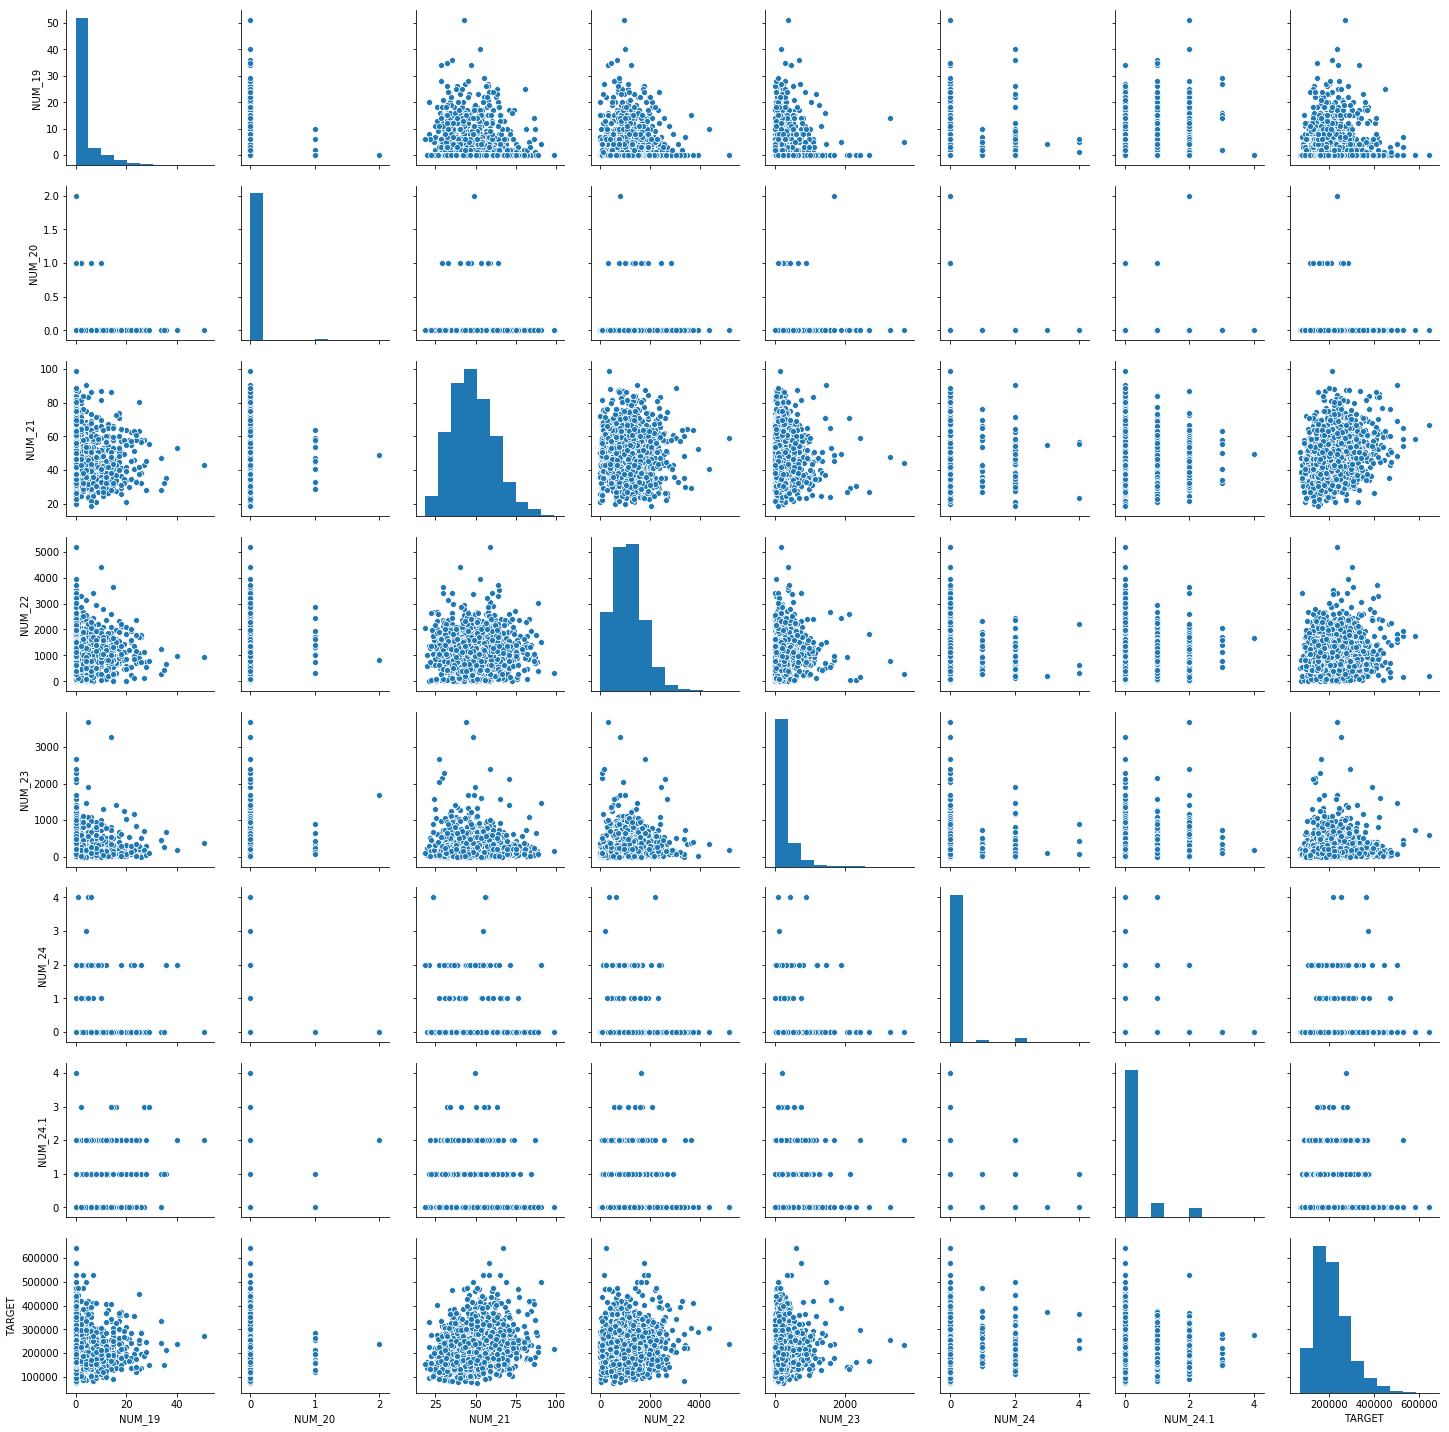

In [61]:
sns.pairplot(data[['NUM_19',
 'NUM_20',
 'NUM_21',
 'NUM_22',
 'NUM_23','NUM_24','NUM_24.1','TARGET']])

In [62]:
#NUM_20, NUM24-24.1 категориальные

In [63]:
#NUM_21 вызывает интерес

In [64]:
data['NUM_21'].describe(percentiles=(0.01,0.99))

count    1526.000000
mean       48.026157
std        13.172192
min        18.736842
1%         23.631579
50%        46.947368
99%        83.052632
max        98.736842
Name: NUM_21, dtype: float64

In [65]:
data['NUM_21']=[np.log(x) for x in data['NUM_21']]

In [66]:
#NUM_22

In [67]:
data['NUM_22'].describe(percentiles=(0.05,0.99))

count    1526.000000
mean     1125.032765
std       641.855596
min         0.000000
5%        119.500000
50%      1083.000000
99%      2974.500000
max      5194.000000
Name: NUM_22, dtype: float64

In [68]:
#Уберем выбросы

In [69]:
data=data[data['NUM_22']<=3030]

In [70]:
#Сделаем распределенние более ровным

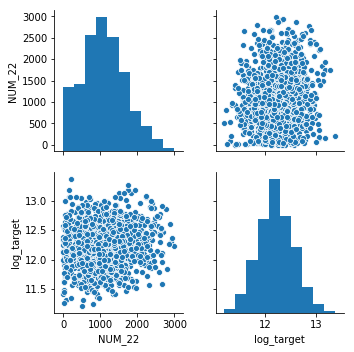

In [71]:
sns.pairplot(data[['NUM_22','log_target']])

In [72]:
#Зависимости не наблюдается

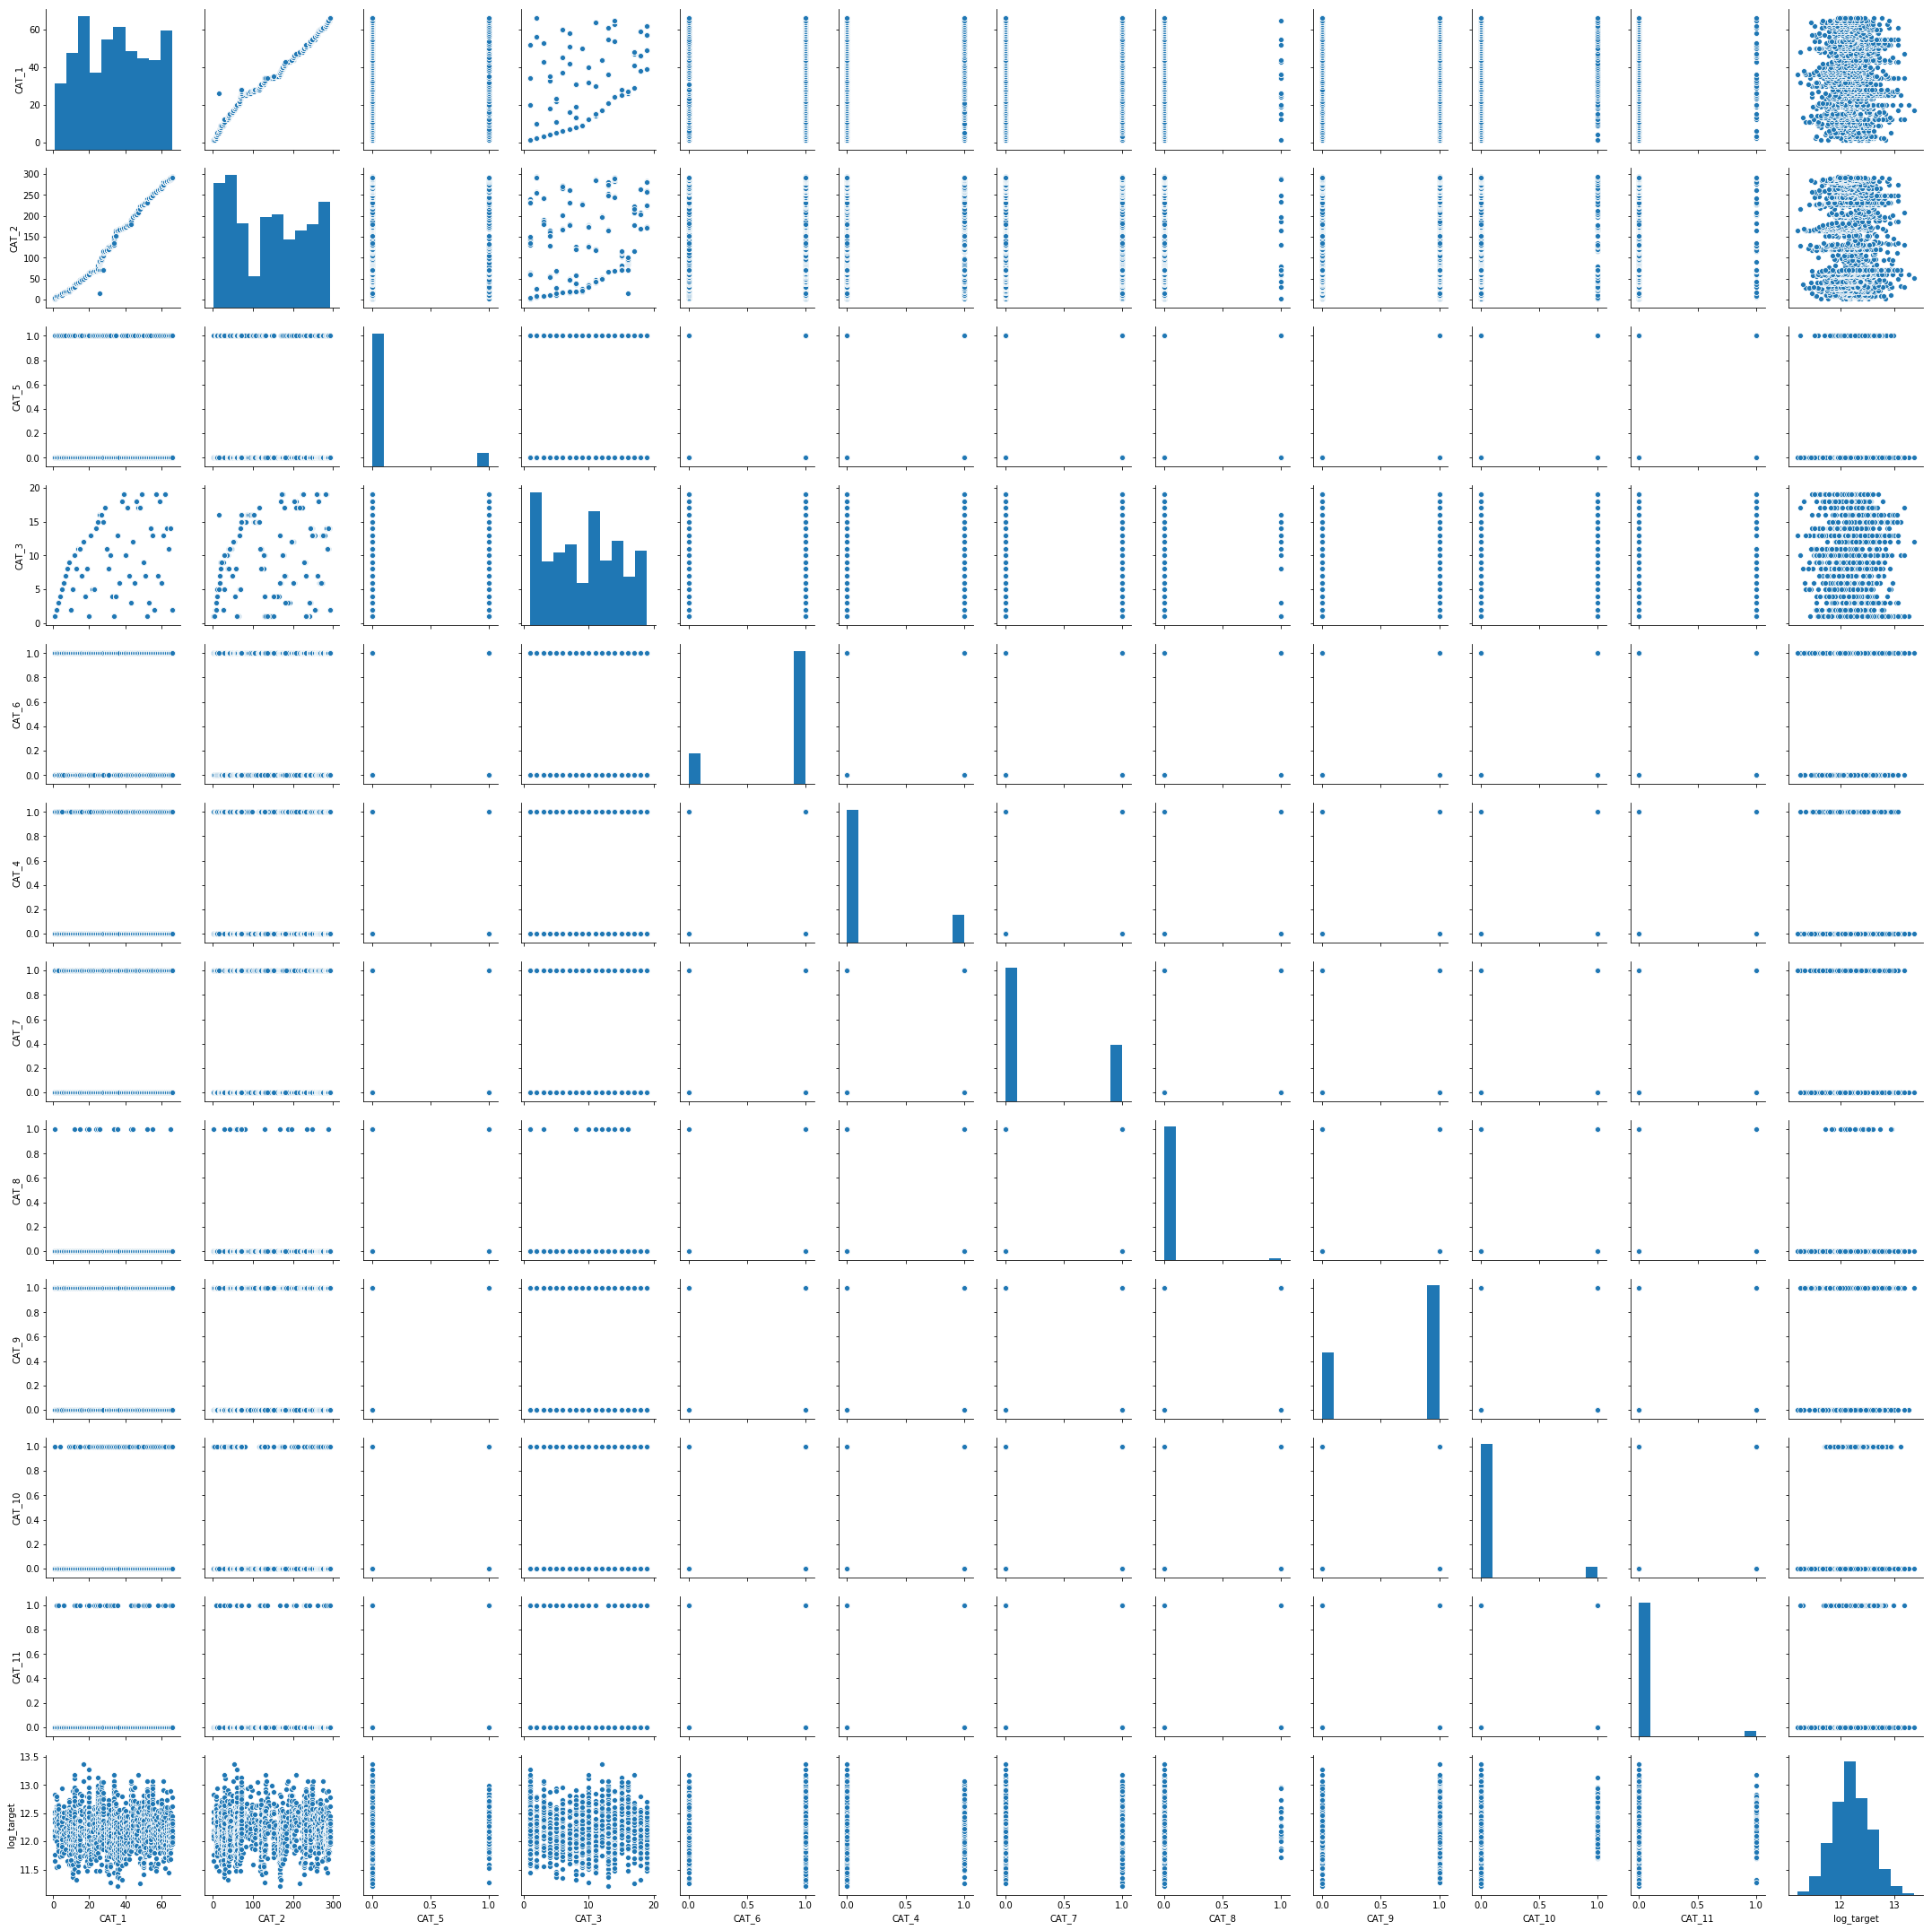

In [73]:
sns.pairplot(data[['CAT_1',
 'CAT_2','CAT_5',
 'CAT_3','CAT_6',
 'CAT_4','CAT_7',
 'CAT_8','CAT_9','CAT_10','CAT_11','log_target']])

In [74]:
#CAT 1-3 больше похожи на числовые
#взаимосвязей нет

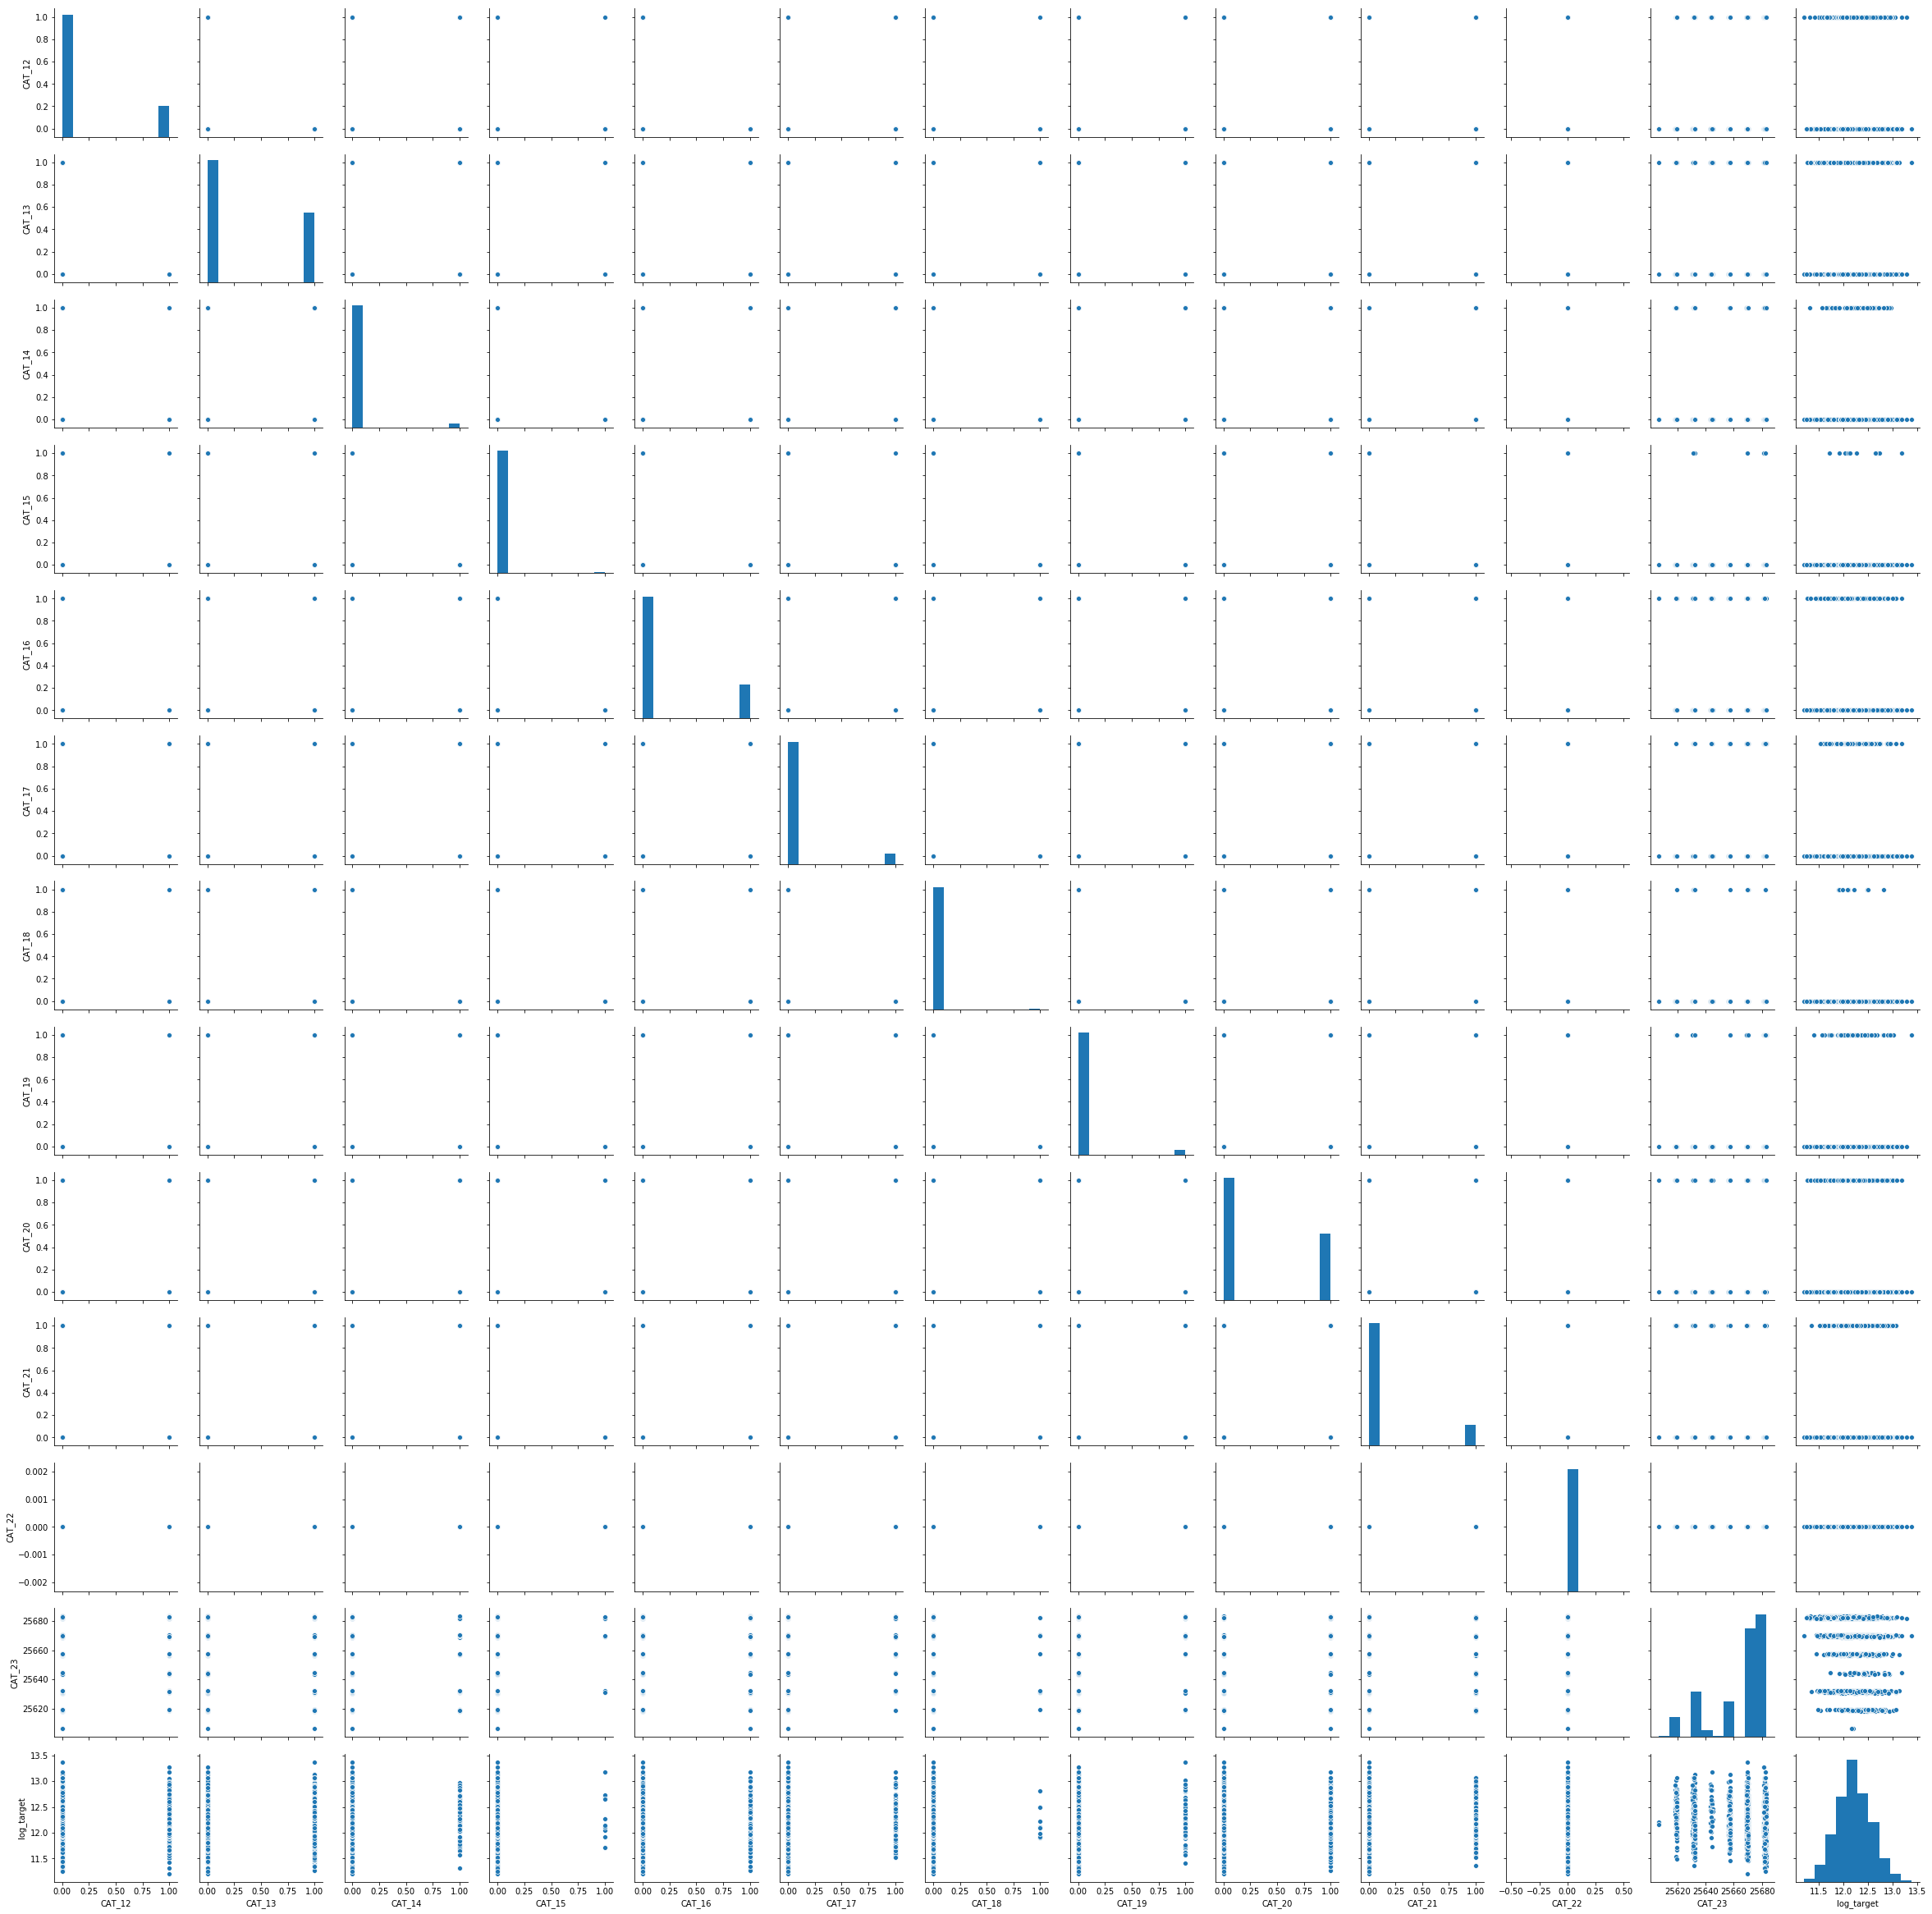

In [75]:
sns.pairplot(data[['CAT_12',
 'CAT_13','CAT_14',
 'CAT_15','CAT_16',
 'CAT_17','CAT_18',
 'CAT_19','CAT_20','CAT_21','CAT_22','CAT_23','log_target']])

In [76]:
data['CAT_23'].describe()

count     1511.000000
mean     25664.387275
std         20.172121
min      25606.624204
25%      25657.070064
50%      25669.808917
75%      25682.165605
max      25683.057325
Name: CAT_23, dtype: float64

In [77]:
#CAT_23- числовая

In [78]:
data['CAT_23']=[1/x if x>0 else x for x in data['CAT_23']]

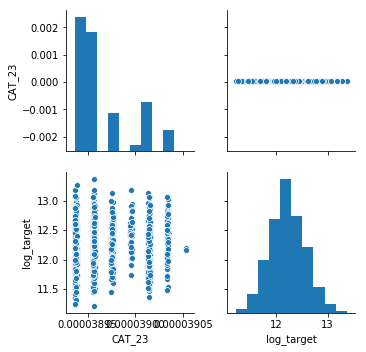

In [79]:
sns.pairplot(data[['CAT_23','log_target']])

In [80]:
#Визуально взаивсовязи между таргетом и переменными нет, даже бокс_плоты не нужны

In [81]:
#Посмотрим на коэффициенты корреляции, помним, что, они подразумевают наличие только линейной взаимосвязи

In [82]:
data.corr()['log_target'].sort_values(ascending=False)[:15]

log_target    1.000000
TARGET        0.972328
NUM_21        0.323253
predict       0.307250
NUM_6         0.289921
CAT_23        0.170574
NUM_22        0.106226
NUM_1         0.092930
CAT_6         0.087047
NUM_14        0.082379
NUM_13        0.073348
NUM_24        0.073324
CAT_21        0.072152
NUM_23        0.070985
NUM_11        0.067553
Name: log_target, dtype: float64

In [102]:
feature_list=list(data.corr()['log_target'].sort_values().keys())[:-2]

In [84]:
data.drop([ 'TARGET'], axis=1, inplace=True)

#Линейная модель не даст хороших результатов, тк нет сильной линейной зависимости между переменными и таргетом. Плюс нужно будет бороться с мультиколлинеарностью

In [104]:
y=data['log_target']
X=data.copy()
X.drop('log_target', axis=1, inplace=True)

In [105]:
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.25, random_state=42, shuffle=False)

In [106]:
an_columns=X.columns.tolist()

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
clf=DecisionTreeRegressor(max_depth=5, max_features=3)

In [109]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=3,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [110]:
y_pred_val=clf.predict(X_valid)

In [111]:
pd.DataFrame(np.exp(y_pred_val)/np.exp(y_valid)).describe()

,log_target
count,378.000000
mean,1.081297
std,0.367396
min,0.341471
25%,0.808310
50%,1.027174
75%,1.282334
max,2.376577


In [112]:
#Далее мы можем удалять по 1 фактору в порядке возрастания их важности

In [113]:
#tab_importance=pd.concat([pd.DataFrame(X.columns.tolist()),pd.DataFrame(clf.feature_importances_)], axis=1)

In [114]:
#tab_importance.columns=['features', 'importance']

In [115]:
#feature_list=list(tab_importance.sort_values(by='importance')['features'].values)

In [116]:
X1=X_train.copy()
test1=X_valid.copy()
for i in feature_list[:-3]:
    X1.drop(i, inplace=True, axis=1)
    test1.drop(i, inplace=True, axis=1)
    clf.fit(X1,y_train)
    y_pred=clf.predict(test1)
    y_pred=np.exp(y_pred)
    print (max(y_pred/np.exp(y_valid)), min(y_pred/np.exp(y_valid)), len(X1.columns))

2.372230692887423 0.3817143088446307 49
2.0161863643725253 0.4173217974570145 48
2.958534635939797 0.3626649334108393 47
2.7300251605343475 0.39735924113047405 46
2.615760612196244 0.3754816229364756 45
2.517722800339412 0.38574810718902797 44
2.0527338321221027 0.3576568838812435 43
2.373785554124799 0.4014088622119491 42
2.1805409431086455 0.3339130014310249 41
2.96190862260796 0.40604931617912404 40
2.614108052065369 0.3173437645365723 39
2.213299589489441 0.4204119340294714 38
2.5452718001127903 0.311770987151076 37
2.203890243182344 0.36413825927020366 36
2.284224433122326 0.4076955198592032 35
2.2727605596099063 0.3671357490542634 34
2.0740895628587777 0.3649948722778111 33
2.470760243420832 0.3695341068408516 32
2.1773490442663834 0.4368220719241161 31
2.009695133351674 0.43545687902730723 30
2.5685593885762947 0.3357913024235569 29
2.561808549705246 0.25308071885308053 28
2.6229450572960507 0.43031552761541836 27
2.2797918134176984 0.36541453369984883 26
2.0727902032892582 0.41

In [98]:
#Лучший результат, если оставить 4 фичи

In [117]:
X_train=X_train[feature_list[-6:]]
X_valid=X_valid[feature_list[-6:]]

In [ ]:
#Попробуем другие модели

In [118]:
import xgboost

In [119]:
from xgboost import XGBRegressor

In [120]:
xboost=XGBRegressor(max_depth=3,learning_rate=0.06, reg_lambda=1.1)

In [121]:
xboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [122]:
y_pred=xboost.predict(X_valid)

In [123]:
pd.DataFrame(np.exp(y_pred)/np.exp(y_valid)).describe(percentiles=(0.25,0.85))

,log_target
count,378.000000
mean,0.978091
std,0.277803
min,0.412299
25%,0.791067
50%,0.952392
85%,1.206924
max,2.103268


In [124]:
#xgboost сработал лучше

In [125]:
#используем gridsearch для поиска стабильной модели

In [126]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,5,7],'learning_rate':[0.06,0.07, 0.08], 'min_child_weight':[1,3,5]}

In [127]:
xboost_check=XGBRegressor(n_jobs=-1, reg_lambda=1.1)

In [128]:
grid_cv = GridSearchCV(xboost_check, parameters, cv=5)
grid_cv.fit(X_train, y_train)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7], 'learning_rate': [0.06, 0.07, 0.08], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [130]:
best_model=grid_cv.best_estimator_

In [131]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [132]:
y_pred=best_model.predict(X_valid)

In [133]:
pd.DataFrame(np.exp(y_pred)/np.exp(y_valid)).describe(percentiles=(0.24,0.85))

,log_target
count,378.000000
mean,0.996749
std,0.283975
min,0.415751
24%,0.789860
50%,0.969780
85%,1.233559
max,2.194777


In [134]:
#N_neighbours

In [135]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=15)

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler2=StandardScaler()

In [137]:
neigh.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='uniform')

In [138]:
y_pred=neigh.predict(X_valid)

In [139]:
pd.DataFrame(np.exp(y_pred)/np.exp(y_valid)).describe(percentiles=(0.25,0.75))

,log_target
count,378.000000
mean,1.032125
std,0.322592
min,0.359491
25%,0.783201
50%,0.989185
75%,1.226306
max,2.138593


In [140]:
neigh1 = KNeighborsRegressor(n_neighbors=7)
X_train1=scaler1.fit_transform(X_train)
neigh1.fit(X_train1, y_train) 
y_pred=neigh1.predict(scaler1.transform(X_valid))
pd.DataFrame(np.exp(y_pred)/np.exp(y_valid)).describe(percentiles=(0.2,0.75))

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,log_target
count,378.000000
mean,1.002920
std,0.297662
min,0.432543
20%,0.757312
50%,0.975119
75%,1.173674
max,2.391763


In [141]:
neigh2 = KNeighborsRegressor(n_neighbors=7)
X_train2=scaler2.fit_transform(X_train)
neigh2.fit(X_train2, y_train) 
y_pred=neigh2.predict(scaler2.transform(X_valid))
pd.DataFrame(np.exp(y_pred)/np.exp(y_valid)).describe(percentiles=(0.2,0.8))

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\volko\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\volko\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


,log_target
count,378.000000
mean,1.003561
std,0.308350
min,0.429550
20%,0.748455
50%,0.973658
80%,1.225913
max,2.348527


In [142]:
regr=[]
#xboost
regr.append(best_model)
#Decision Tree
parameters2 = {'max_depth':[2,3,4,5,6,7,8,9,10]}
model_best2 = GridSearchCV(DecisionTreeRegressor(), parameters2, cv=10, n_jobs=-1)
model_best2.fit(X_train, y_train)
best=model_best2.best_params_
regr2=DecisionTreeRegressor(max_depth=best['max_depth'])
regr.append(regr2)
#regr.append(neigh1)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [143]:
meta_train=np.array([0.]*len(y_train))
from sklearn.model_selection import KFold
stack_cv = KFold(n_splits=5, random_state=42)

In [154]:
test=pd.read_excel('Data_.xlsx', sheet_name='Test')
y_test=test['TARGET']
test.drop('TARGET', axis=1, inplace=True)
#test['NUM_6']=[x**4 for x in test['NUM_6']]
test['NUM_21']=[np.log(x) if x>0 else x for x in test['NUM_21']]
test['CAT_23']=[1/x if x>0 else x for x in test['CAT_23']]

In [155]:
X_valid.head()

,NUM_1,NUM_22,CAT_23,NUM_6,predict,NUM_21
1173,0,1865,0.000039,9200,137562.037475,3.262137
1174,0,1514,0.000039,10300,205898.910771,3.901441
1175,0,1212,0.000039,9200,207449.123289,3.662211
1176,0,750,0.000039,10300,216751.496750,3.750123
1177,0,1169,0.000039,10300,207254.946760,3.354510


In [156]:
test.drop('ID', axis=1, inplace=True)

In [157]:
test['predict']=fit.forecast(len(test)).values.tolist()

In [158]:
test=test[feature_list[-6:]]

In [159]:
#Построим анасамбль, тк ансамблевые модели самые стабильные

In [160]:
def meta_features(regr):
    for_meta_valid=[]
    for_meta_test=[]
    if regr==neigh1:
        for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train1)):
            regr.fit(X_train1[train_ind], y_train.iloc[train_ind])
            meta_train[test_ind] = regr.predict(X_train1[test_ind])
            for_meta_valid.append(regr.predict(scaler1.transform(X_valid)))
            for_meta_test.append(regr.predict(scaler1.transform(test)))
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train)):
        regr.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = regr.predict(X_train.iloc[test_ind])
        for_meta_valid.append(regr.predict(X_valid))
        for_meta_test.append(regr.predict(test))
    for_meta_valid_T=np.array(for_meta_valid).T
    for_meta_test_T=np.array(for_meta_test).T
    for i in for_meta_valid_T:
        meta_valid.append(sum(i)/5)
    for i in for_meta_test_T:
        meta_test.append(sum(i)/5)
    return meta_train, meta_valid, meta_test

In [161]:
meta_train_list=[]
meta_valid_list=[]
meta_test_list=[]
for i in regr:
    meta_test=[]
    meta_valid=[]
    meta_features(i)
    a=meta_train.copy()
    meta_train_list.append(a)
    meta_valid_list.append(meta_valid)
    meta_test_list.append(meta_test)

In [162]:
X_meta_train = pd.DataFrame(np.stack(meta_train_list, axis=1), columns=['xb','dt'])
X_meta_valid = pd.DataFrame(np.stack(meta_valid_list, axis=1), columns=['xb', 'dt'])
X_meta_test = pd.DataFrame(np.stack(meta_test_list, axis=1), columns=['xb', 'dt'])

In [163]:
model_emb=XGBRegressor(learning_rate=0.15)
model_emb.fit(X_meta_train, y_train)
y_pred_val=model_emb.predict(X_meta_valid)
y_pred_test=model_emb.predict(X_meta_test)

In [164]:
pd.DataFrame(np.exp(y_pred_val)/np.exp(y_valid)).describe(percentiles=(0.21,0.81))

,log_target
count,378.000000
mean,1.013777
std,0.304307
min,0.402948
21%,0.766643
50%,0.978363
81%,1.227734
max,2.334611


In [165]:
pd.DataFrame(np.exp(y_pred_test)/y_test).describe(percentiles=(0.21,0.78))

,TARGET
count,465.000000
mean,1.499402
std,0.521486
min,0.474524
21%,1.090858
50%,1.410550
78%,1.805946
max,4.459284


In [167]:
#Предсказывает в k раз больше
pd.DataFrame(np.exp(y_pred_test)/1.41/y_test).describe(percentiles=(0.21,0.78))

,TARGET
count,465.000000
mean,1.063405
std,0.369849
min,0.336542
21%,0.773658
50%,1.000390
78%,1.280813
max,3.162613


In [ ]:
#Может быть временная переменная не улавливает тренд на понижение